In [1]:
# importing necessary libraries
import pandas as pd
import pymysql
import requests
import matplotlib.pyplot as plt
import requests


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# function to connect to wiki_dbs and query
def connect_and_query(wiki_name, query, cnf_path = "/home/paws/.my.cnf"):
    
    conn = pymysql.connect(host = wiki_name + '.analytics.db.svc.wikimedia.cloud',
                           read_default_file = cnf_path,
                           database = wiki_name + '_p')
    
    with conn.cursor() as cur:
        cur.execute(query)
        data = cur.fetchall()
    
    conn.close()
    return data

**Content Usage Across Wikis**

Top 25 most used templates in Telugu, Hindi, and Malayalam Wikipedias
Displayed as tables for each wiki, this highlights the most frequently used content templates

In [4]:
query_url = "https://raw.githubusercontent.com/UshaKiran31/community-insights-dashboard-tooling/main/Content-Top%2025%20Most%20Used%20Templates.sql"
query = requests.get(query_url).text

In [5]:
wikis = ['tewiki', 'hiwiki', 'mlwiki']
all_dfs = []

# Loop and fetch data for each wiki
for wiki in wikis:
    output = connect_and_query(wiki, query)
    df = pd.DataFrame(output, columns=['template_name', 'usage_count'])
    df['wiki'] = wiki  # Add differentiation column
    all_dfs.append(df)

# Combine all into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

In [6]:
def decode_bytes(val):
    if isinstance(val, bytes):
        return val.decode('utf-8')
    return val

for col in combined_df.columns:
    combined_df[col] = combined_df[col].apply(decode_bytes)

In [7]:
for wiki in ['tewiki', 'hiwiki', 'mlwiki']:
    print(f"Top 10 editors for {wiki}")
    display(
        combined_df[combined_df['wiki'] == wiki]
        .reset_index(drop=True)
    )

Top 10 editors for tewiki


,template_name,usage_count,wiki
0,Sitesupportpage,139400,tewiki
1,Gnunote,22507,tewiki
2,మొదటి_పేజీ_లింకులు,17204,tewiki
3,సుస్వాగతము,17198,tewiki
4,మార్గదర్శిని,16702,tewiki
5,సంవత్సరము_బుధ_5,4011,tewiki
6,Infobox_person_male,2056,tewiki
7,చిన్నపట్టీ,1094,tewiki
8,దక్షిణ_ఆసియా,1062,tewiki
9,నెలలు,666,tewiki


Top 10 editors for hiwiki


,template_name,usage_count,wiki
0,Sitesupportpage,7554,hiwiki
1,Country_data_Sudan,1955,hiwiki
2,कोष्टक_जीवनी,1588,hiwiki
3,All_messages,1285,hiwiki
4,Unverified,1218,hiwiki
5,GFDL,1121,hiwiki
6,Esoteric,347,hiwiki
7,I,306,hiwiki
8,भारतीय_महिला_स्वतंत्रता_सेनानी,296,hiwiki
9,ज्ञानसन्दूक_क्रिकेट_खिलाड़ी,249,hiwiki


Top 10 editors for mlwiki


,template_name,usage_count,wiki
0,Sitesupportpage,9307,mlwiki
1,ML_SCRIPT,5435,mlwiki
2,ENGc,4384,mlwiki
3,INDc,4384,mlwiki
4,NZLc,4222,mlwiki
5,BANc,4220,mlwiki
6,HOLf,3272,mlwiki
7,WINc,2934,mlwiki
8,മാർജ്ജാരവംശം,2932,mlwiki
9,RSAc,2777,mlwiki


In [8]:
# Function to sanitize non-ASCII values
import re
def sanitize_text(val):
    if re.fullmatch(r'[A-Za-z0-9 _.-]+', str(val)):
        return val
    return "other language"

# Sanitize template_name column
combined_df['template_name'] = combined_df['template_name'].apply(sanitize_text)


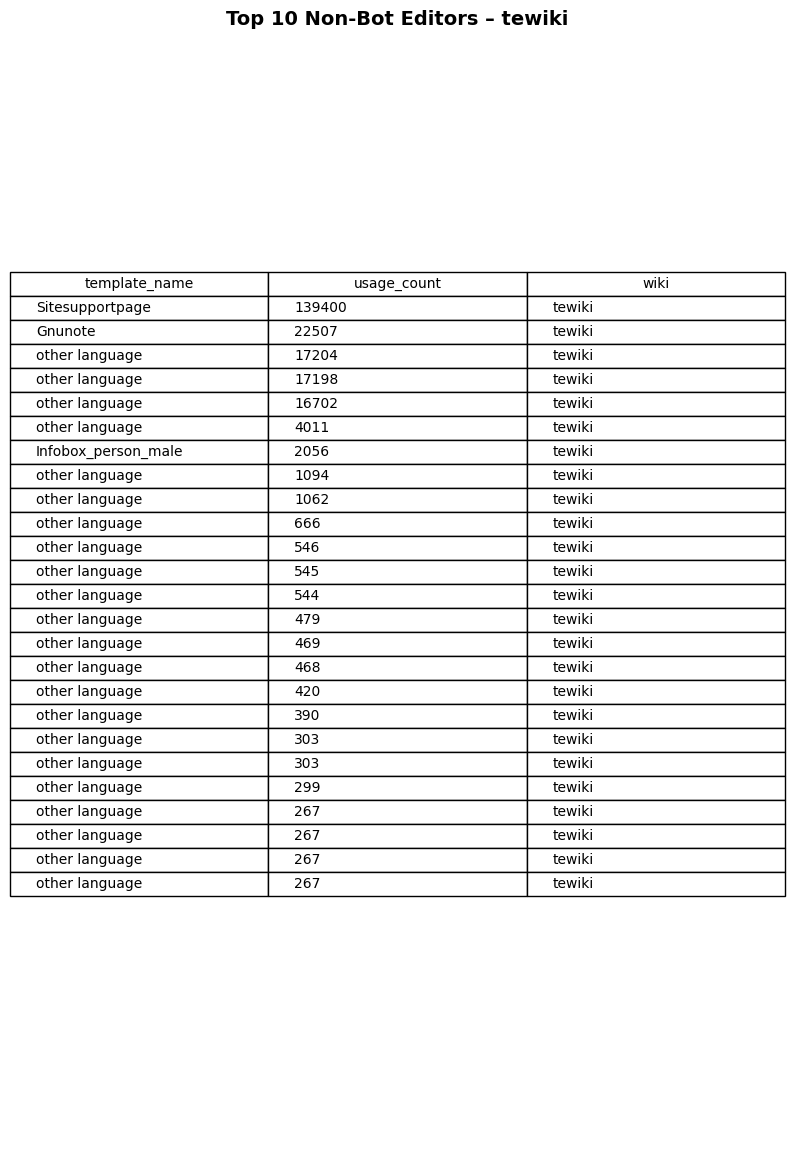

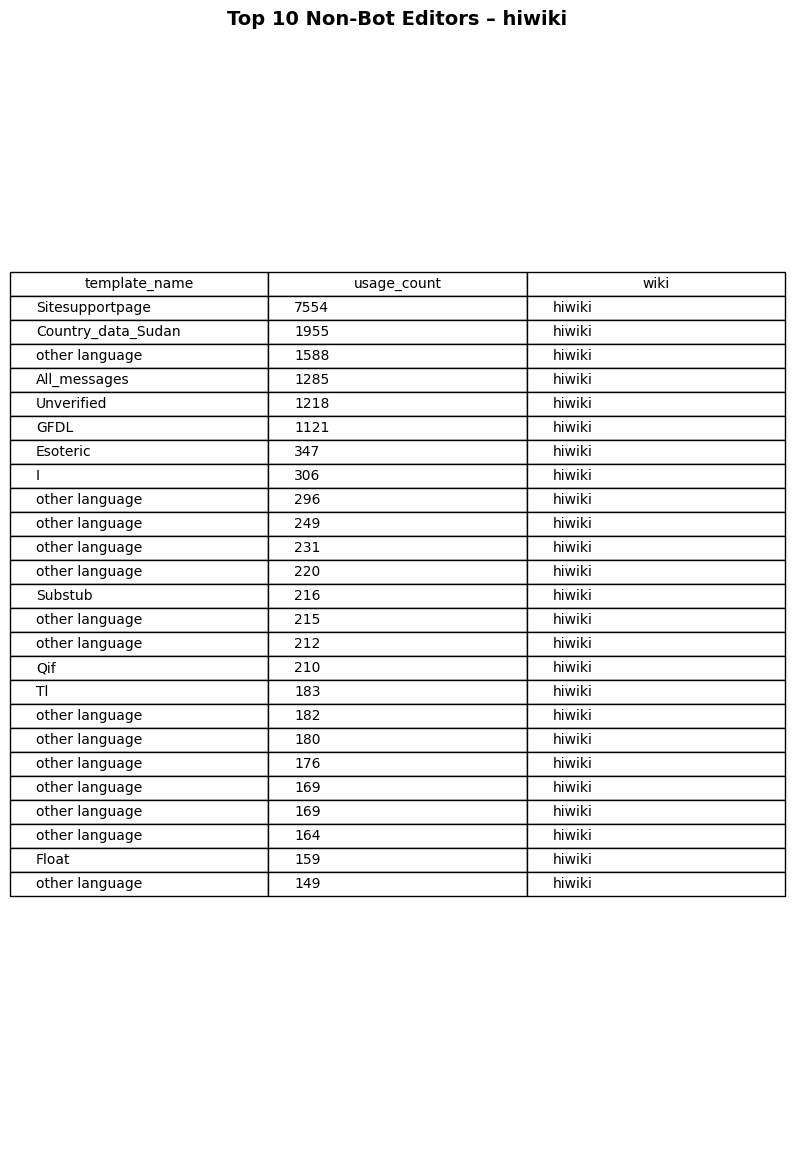

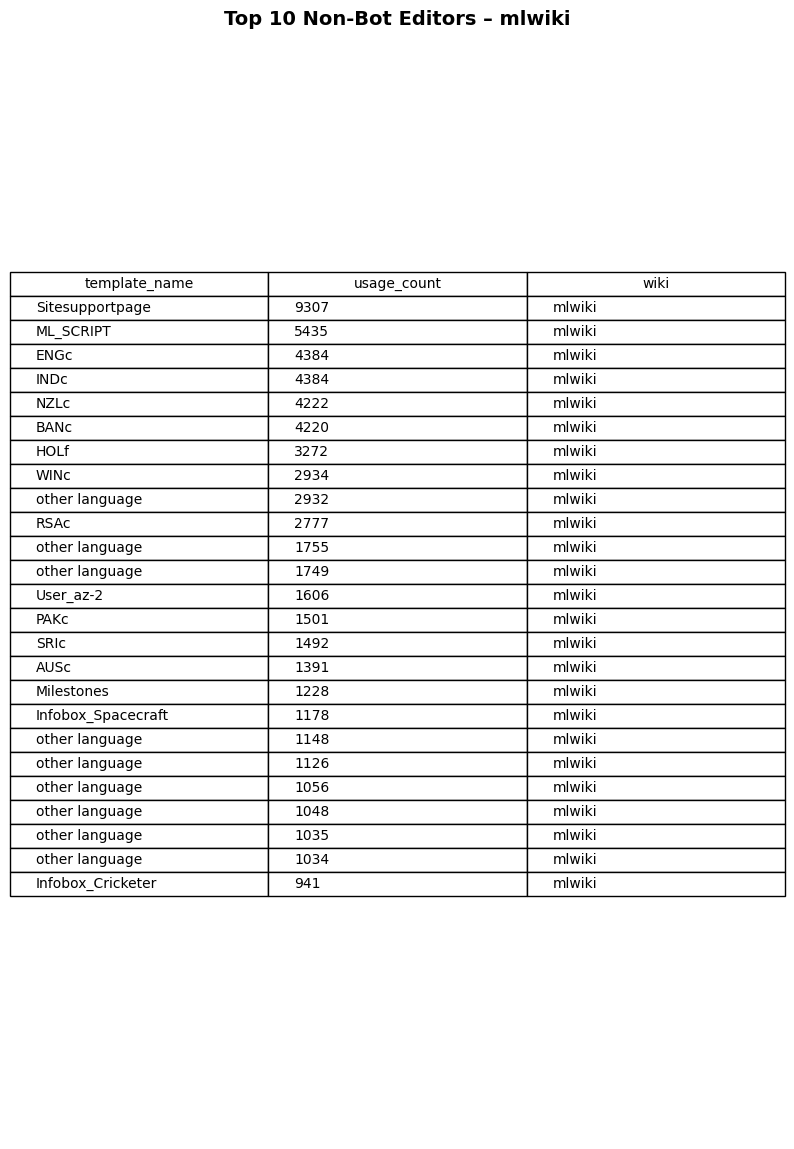

In [9]:
# Plot tables
for wiki in wikis:
    df_wiki = combined_df[combined_df['wiki'] == wiki].reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(10, len(df_wiki) * 0.6))
    ax.axis('off')

    table = ax.table(
        cellText=df_wiki.values,
        colLabels=df_wiki.columns,
        cellLoc='left',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.title(f"Top 10 Non-Bot Editors – {wiki}", fontsize=14, weight='bold', pad=1)
    plt.subplots_adjust(top=0.85) 
    plt.show()

**Yearly Active Editors – Rolling YoY** 

Number of editors with at least one edit (Rolling YoY) for each wiki
Visualized using a bar graph with a moving average line

In [10]:
query_url = "https://raw.githubusercontent.com/UshaKiran31/community-insights-dashboard-tooling/main/Editors-Number%20of%20editors%20with%20at%20least%20one%20edit.sql"
query = requests.get(query_url).text

In [11]:
wikis = ['tewiki', 'hiwiki', 'mlwiki']
all_dfs = []

# Loop and fetch data for each wiki
for wiki in wikis:
    output = connect_and_query(wiki, query)
    df = pd.DataFrame(output, columns=['edit_year', 'active_editors'])
    df['wiki'] = wiki  # Add differentiation column
    all_dfs.append(df)

# Combine all into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

In [12]:
combined_df

,edit_year,active_editors,wiki
0,2025,927,tewiki
1,2024,1466,tewiki
2,2023,1422,tewiki
3,2022,1504,tewiki
4,2021,1573,tewiki
5,2020,1523,tewiki
6,2019,1511,tewiki
7,2025,5198,hiwiki
8,2024,7901,hiwiki
9,2023,10503,hiwiki


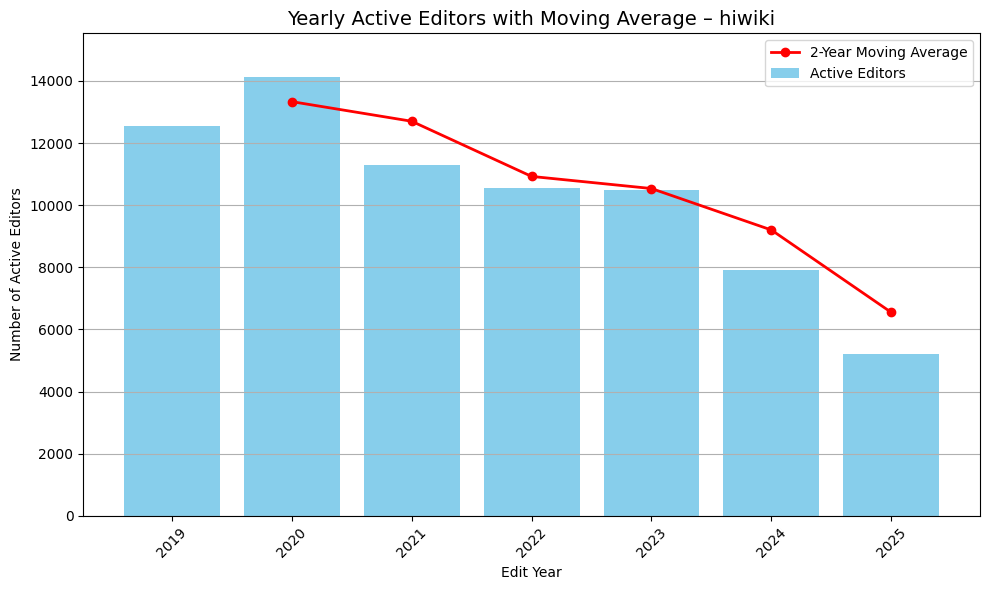

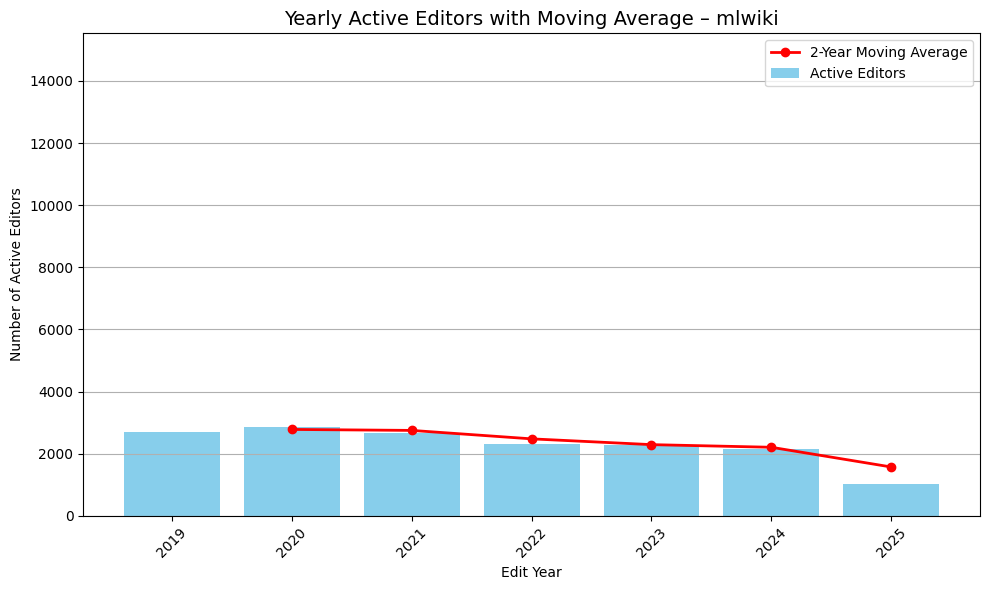

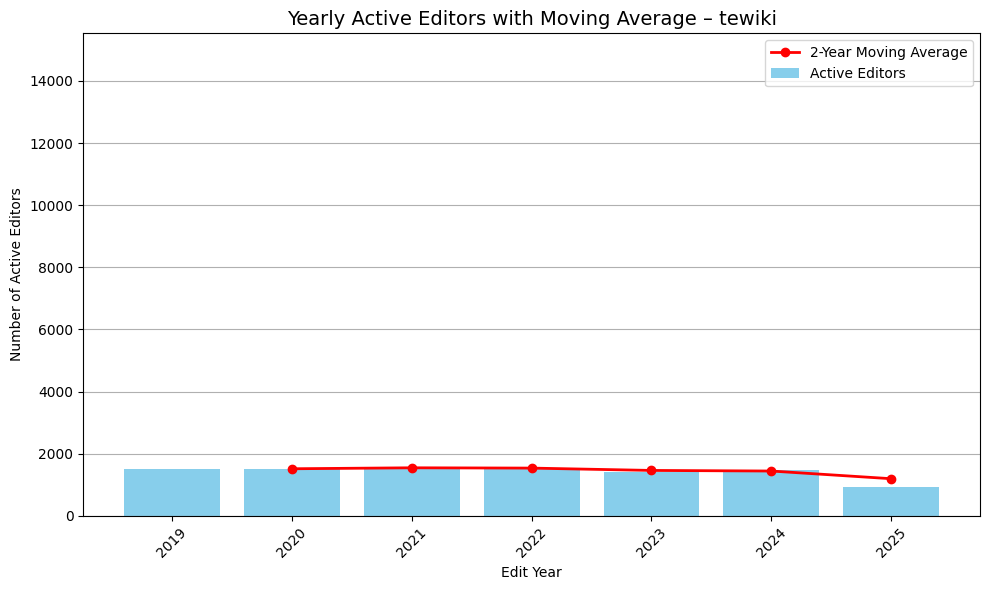

In [13]:
# Combine all into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df = combined_df.sort_values(by=['wiki', 'edit_year'])

# Compute 2-year moving average per wiki
combined_df['moving_avg'] = (
    combined_df.groupby('wiki')['active_editors']
    .transform(lambda x: x.rolling(window=2).mean())
)

# Compute global max for uniform y-axis
max_editors = combined_df['active_editors'].max()

# Plot per wiki
for wiki in combined_df['wiki'].unique():
    df_wiki = combined_df[combined_df['wiki'] == wiki]

    plt.figure(figsize=(10, 6))
    plt.bar(df_wiki['edit_year'], df_wiki['active_editors'], color='skyblue', label='Active Editors')
    plt.plot(df_wiki['edit_year'], df_wiki['moving_avg'], color='red', marker='o', linewidth=2, label='2-Year Moving Average')

    plt.title(f'Yearly Active Editors with Moving Average – {wiki}', fontsize=14)
    plt.xlabel('Edit Year')
    plt.ylabel('Number of Active Editors')
    plt.ylim(0, max_editors * 1.1)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

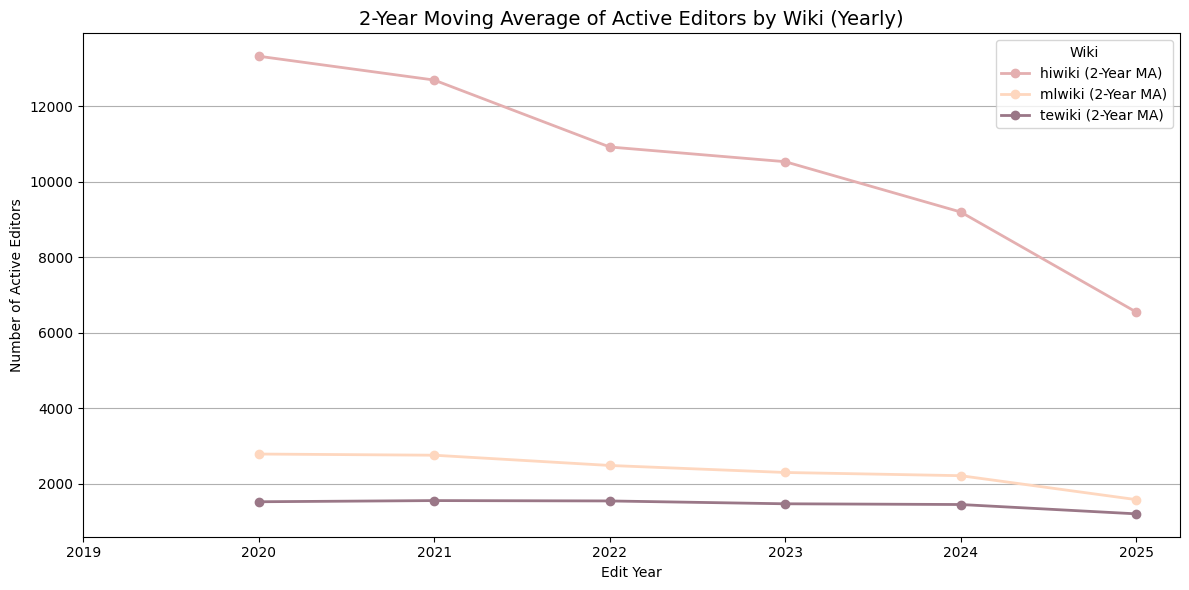

In [14]:
# Combine and process
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df = combined_df.sort_values(by=['wiki', 'edit_year'])

# Compute 2-year moving average per wiki
combined_df['moving_avg'] = (
    combined_df
    .groupby('wiki')['active_editors']
    .transform(lambda x: x.rolling(window=2).mean())
)

# Plot: One plot for all wikis
plt.figure(figsize=(12, 6))

colors = {
    'tewiki':'#9A7787',
    'hiwiki':'#E4AFB0',
    'mlwiki':'#FED7BF'
}

for wiki in combined_df['wiki'].unique():
    df_wiki = combined_df[combined_df['wiki'] == wiki]
    plt.plot(
        df_wiki['edit_year'],
        df_wiki['moving_avg'],
        marker='o',
        linestyle='-',
        linewidth=2,
        label=f"{wiki} (2-Year MA)",
        color=colors.get(wiki, None)
    )

# Decorations
plt.title('2-Year Moving Average of Active Editors by Wiki (Yearly)', fontsize=14)
plt.xlabel('Edit Year')
plt.ylabel('Number of Active Editors')
plt.grid(True, axis='y')
plt.xticks(sorted(combined_df['edit_year'].unique()))
plt.legend(title="Wiki")
plt.tight_layout()
plt.show()

**Non-Bot Editors**

Top 10 most active non-bot registered editors in each language wiki
Tabular representation showing usernames and their edit counts, spotlighting the most involved contributors in Telugu, Hindi, and Malayalam Wikipedias.

In [19]:
import matplotlib
query_url = "https://raw.githubusercontent.com/UshaKiran31/community-insights-dashboard-tooling/main/Editors-Top%2010%20non-bot%20registered%20users%20for%20the%20selected%20time%20period.sql"
query = requests.get(query_url).text

In [16]:
wikis = ['tewiki', 'hiwiki', 'mlwiki']
all_dfs = []

# Loop and fetch data for each wiki
for wiki in wikis:
    output = connect_and_query(wiki, query)
    df = pd.DataFrame(output, columns=['username', 'edits'])
    df['wiki'] = wiki  # Add differentiation column
    all_dfs.append(df)

# Combine all into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

In [17]:
def decode_bytes(val):
    if isinstance(val, bytes):
        return val.decode('utf-8')
    return val

for col in combined_df.columns:
    combined_df[col] = combined_df[col].apply(decode_bytes)


Top 10 editors for tewiki


,username,edits
0,Batthini Vinay Kumar Goud,9994
1,T.sujatha,7107
2,యర్రా రామారావు,6184
3,InternetArchiveBot,2646
4,Pranayraj1985,2523
5,K.Venkataramana,2077
6,Muralikrishna m,1989
7,Nrgullapalli,1429
8,Kopparthi janardhan1965,1363
9,BvprasadAWB,1255


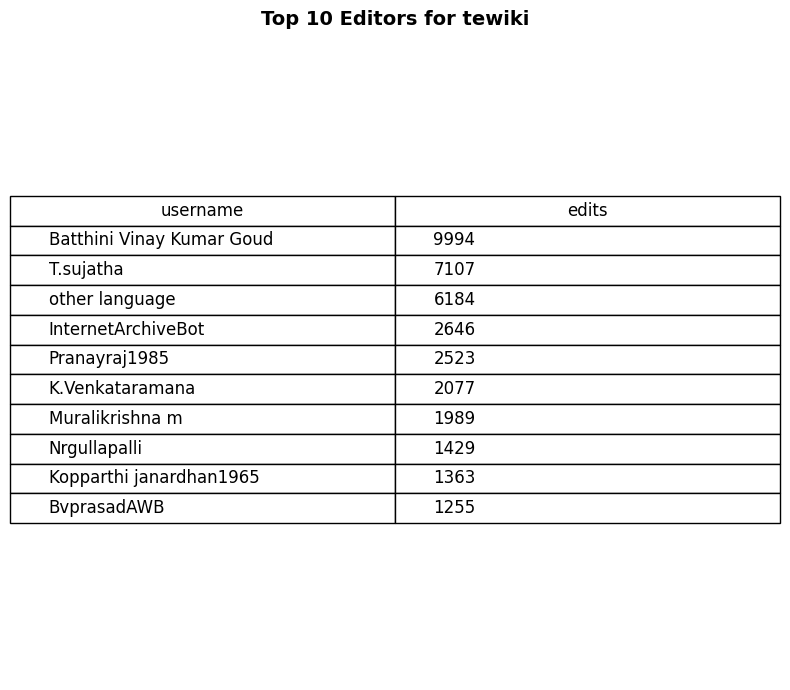


Top 10 editors for hiwiki


,username,edits
0,नया सदस्य सन्देश,8216
1,संजीव कुमार,2923
2,InternetArchiveBot,2612
3,Neeelzzz20,1421
4,The Sorter,1169
5,चाहर धर्मेंद्र,817
6,DreamRimmer,572
7,अनुनाद सिंह,535
8,खास विशेष,523
9,Chronos.Zx,357


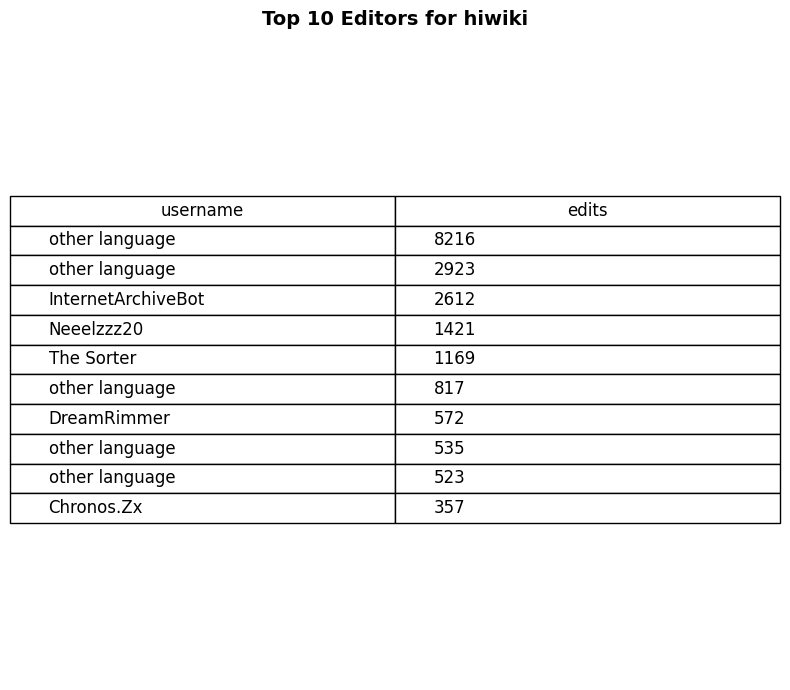


Top 10 editors for mlwiki


,username,edits
0,GnoeeeBot,4119
1,InternetArchiveBot,2204
2,സ്വാഗതസംഘം,1764
3,Meenakshi nandhini,1307
4,Malikaveedu,1075
5,Adarshjchandran,766
6,Altocar 2020,457
7,Fotokannan,434
8,Dvellakat,423
9,78.149.245.245,390


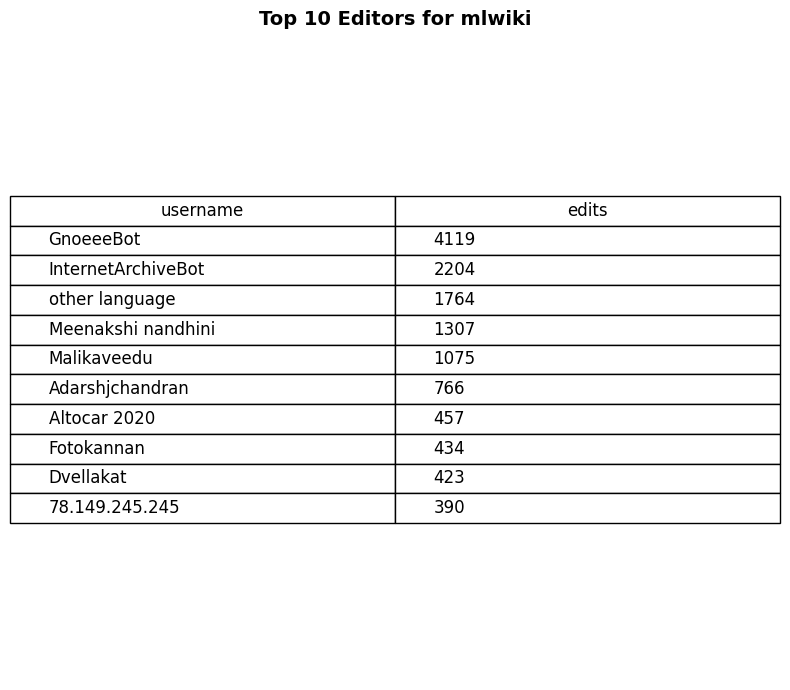

In [18]:
import matplotlib.pyplot as plt
import re

# Define the target wikis
wikis = ['tewiki', 'hiwiki', 'mlwiki']

# Helper function: Only allow English letters/numbers
def sanitize_username(username):
    if re.fullmatch(r'[A-Za-z0-9 _.-]+', str(username)):
        return username
    return "other language"

for wiki in wikis:
    # Top 10 editors per wiki
    top_editors = (
        combined_df[combined_df['wiki'] == wiki]
        .sort_values(by='edits', ascending=False)
        .loc[:, ['username', 'edits']]
        .head(10)
        .reset_index(drop=True)
    )

    # Replace usernames from other languages
    display_df = top_editors.copy()
    print(f"\nTop 10 editors for {wiki}")
    display(display_df)
    display_df['username'] = display_df['username'].apply(sanitize_username)

    

    # Table plotting
    fig, ax = plt.subplots(figsize=(8, len(display_df) * 0.6 + 1))
    ax.axis('off')

    table = ax.table(
        cellText=display_df.values,
        colLabels=display_df.columns,
        cellLoc='left',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    ax.set_title(f"Top 10 Editors for {wiki}", fontsize=14, weight='bold', pad=10)

    plt.tight_layout()
    plt.show()
